In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In [96]:
a=0
b=10
T = np.linspace(a,b,100)
Z_t = np.exp(-T*(3/2))*(np.cos(T*(np.sqrt(3)/2))+np.sqrt(3)*np.sin(T*(np.sqrt(3)/2)))

In [97]:
def EulerMM(a,b,h):
    t = np.arange(a,b+h,h)
    
    x = np.empty(len(t))
    y = np.empty(len(t))
    x[0] = 1
    y[0] = 0
    for i in range(0,len(t)-1):
        x[i+1] = x[i] + h*y[i]
        y[i+1] = y[i] - h*(3*x[i]+3*y[i])
    return x

In [98]:
# T = np.linspace(0,2*np.pi,100)
h=T[1]-T[0]
xx=EulerMM(a,b,h)

Text(0, 0.5, 'Z(t)')

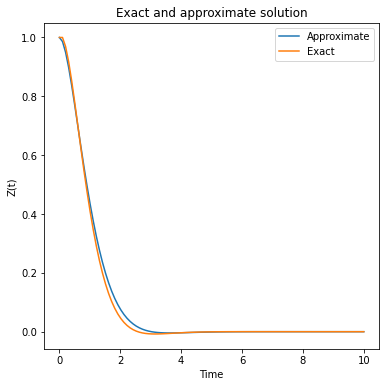

In [111]:
plt.figure(figsize=(6,6))

plt.plot(T,Z_t)
plt.plot(T,xx)
plt.title('Exact and approximate solution')
plt.legend(['Approximate','Exact'])
plt.xlabel("Time")
plt.ylabel("Z(t)")
# plt.legend(['Beta1','Beta2','Beta3'])

# Exercise 4

In [72]:
def VDamp(a,b,h,beta):
    N = int((b-a)/h)
    t = np.linspace(a,b,N+1)
    
    x = np.empty(N+1)
    y = np.empty(N+1)
    x[0] = 1
    y[0] = 1
    for i in range(0,N):
        c = -x[i] - y[i]*beta
        x[i+1] = x[i] + h*y[i] + 0.5*(h**2)*c
        c1 = -x[i+1] - beta*(y[i]+h*c)
        y_hat = y[i] + (h/2)*(c+c1)
        c2 = -x[i+1] - beta*y_hat
        y[i+1] = y[i] + (h/2)*(c+c2)
    return x,y

In [73]:
a = 0
b = 20
h=0.01
t = np.arange(a,b+h,h)
################################################
beta1 = 0.5
beta2 = 1.5
beta3 = 2.5
x1,y1 = VerletDamp(a,b,h,beta1)
x2,y2 = VerletDamp(a,b,h,beta2)
x3,y3 = VerletDamp(a,b,h,beta3)

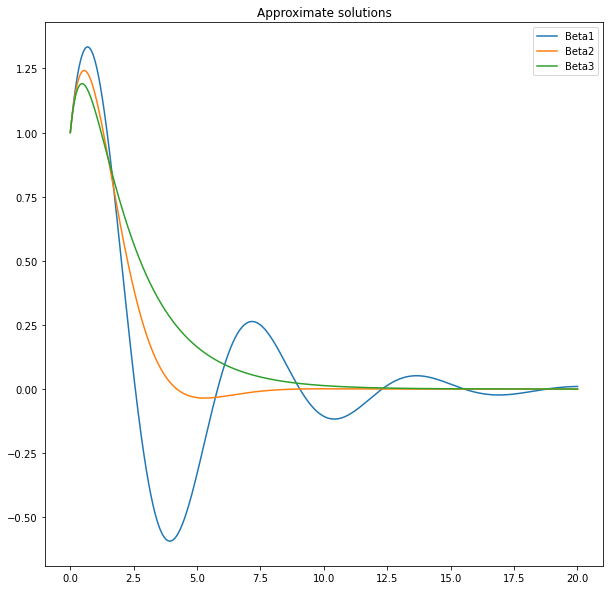

In [74]:
plt.figure(figsize=(10,10))


plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,x3)
plt.title('Approximate solutions')
plt.legend(['Beta1','Beta2','Beta3'])

In [104]:
def acceleration(x,y,b):
    return -x-b*y

# def w(xx,yy,hh,b):
#     v = v(xx,yy,b)
#     return -xx - beta*(yy+h*v)

In [108]:
def VDamp1(a,b,h,acceleration,beta):
    N = int((b-a)/h)
    t = np.linspace(a,b,N+1)
    
    x = np.empty(N+1)
    y = np.empty(N+1)
    x[0] = 1
    y[0] = 1
    i = 0
    while i<N:
        x[i+1] = x[i] + h*y[i] + (1/2)*(h**2)*acceleration(x[i],y[i],beta)
        c1 = -x[i+1] - beta*(y[i]+h*acceleration(x[i],y[i],beta))
        y_hat = y[i] + (h/2)*(acceleration(x[i],y[i],beta)+c1)
        c2 = -x[i+1] - beta*y_hat
        y[i+1] = y[i] + (h/2)*(acceleration(x[i],y[i],beta)+c2)
        i = i+1
    return t,x,y

In [109]:
a = 0
b = 20
h=0.01
# t = np.arange(a,b+h,h)
################################################
beta1 = 0.5
beta2 = 1.5
beta3 = 2.5
t,x1,y1 = VDamp1(a,b,h,v,beta1)
t,x2,y2 = VDamp1(a,b,h,v,beta2)
t,x3,y3 = VDamp1(a,b,h,v,beta3)

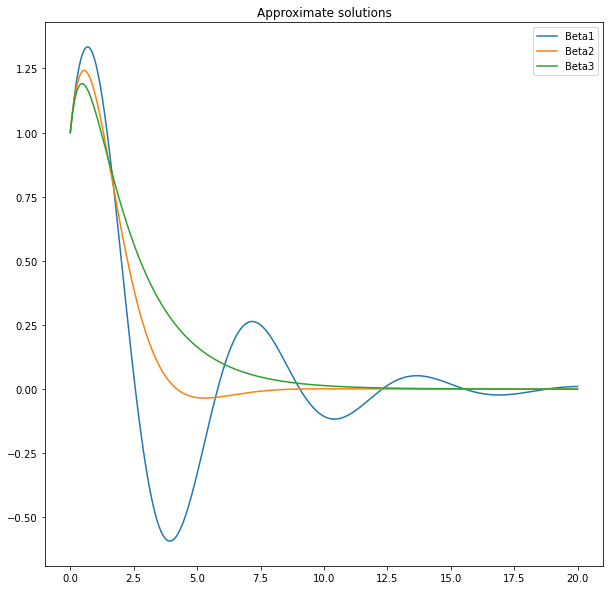

In [110]:
plt.figure(figsize=(10,10))


plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,x3)
plt.title('Approximate solutions')
plt.legend(['Beta1','Beta2','Beta3'])